In [6]:
import pandas as pd

# Load the CSV data into a DataFrame, skipping the initial lines
df = pd.read_csv("co2_annmean_gl.csv", skiprows=37)

# Display the DataFrame to verify that the data has been loaded correctly
print(df)


    year    mean   unc
0   1979  336.85  0.10
1   1980  338.91  0.07
2   1981  340.11  0.08
3   1982  340.85  0.03
4   1983  342.53  0.05
5   1984  344.07  0.07
6   1985  345.54  0.07
7   1986  346.97  0.07
8   1987  348.68  0.09
9   1988  351.16  0.07
10  1989  352.79  0.06
11  1990  354.06  0.07
12  1991  355.39  0.06
13  1992  356.09  0.06
14  1993  356.83  0.07
15  1994  358.33  0.07
16  1995  360.17  0.05
17  1996  361.93  0.04
18  1997  363.05  0.05
19  1998  365.70  0.04
20  1999  367.80  0.07
21  2000  368.96  0.06
22  2001  370.57  0.05
23  2002  372.58  0.04
24  2003  375.15  0.04
25  2004  376.95  0.06
26  2005  378.98  0.05
27  2006  381.15  0.05
28  2007  382.90  0.05
29  2008  385.02  0.05
30  2009  386.50  0.04
31  2010  388.76  0.06
32  2011  390.63  0.06
33  2012  392.65  0.07
34  2013  395.40  0.06
35  2014  397.34  0.05
36  2015  399.65  0.05
37  2016  403.06  0.07
38  2017  405.22  0.07
39  2018  407.61  0.07
40  2019  410.07  0.08
41  2020  412.44  0.06
42  2021  4

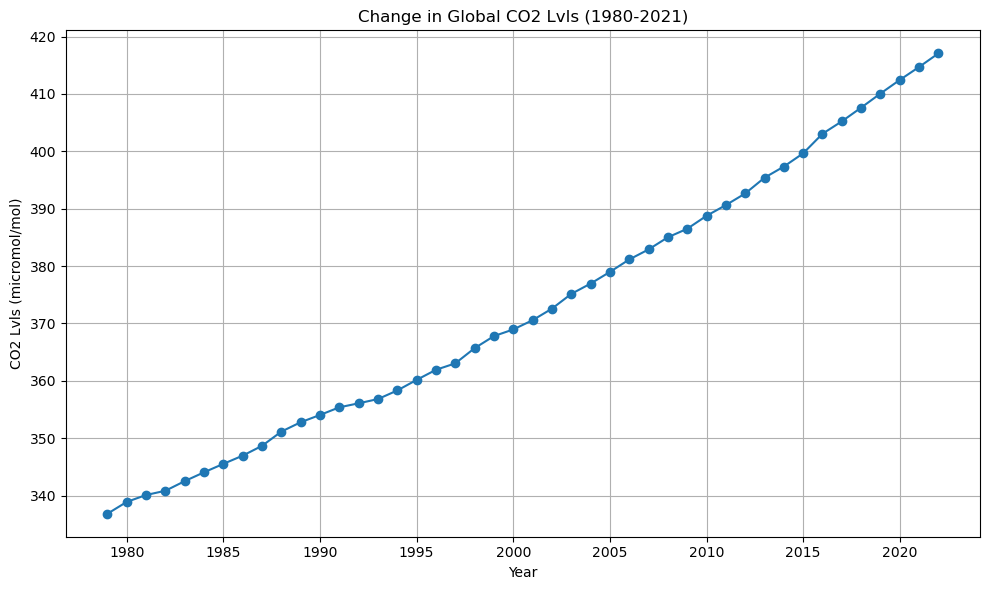

In [8]:
import matplotlib.pyplot as plt

# extract data for plot
years = df['year']
co2_levels = df['mean']

# create plot
plt.figure(figsize=(10, 6))
plt.plot(years, co2_levels, marker='o', linestyle='-')
plt.title('Change in Global CO2 Lvls (1980-2021)')
plt.xlabel('Year')
plt.ylabel('CO2 Lvls (micromol/mol)')
plt.grid(True)
plt.xticks(range(1980, 2023, 5))  # show ticks spaced 5 years for readability
plt.tight_layout()

# show plot
plt.show()


In [9]:
from sklearn.linear_model import LinearRegression

# extract feature year and target variable mean CO2
X = df[['year']]
y = df['mean']

# linear regression model
model = LinearRegression()

# fit model to data
model.fit(X, y)

# print the coefficients
# intercept: value of CO2 lvl when year is 0 
# helps to ensure line fits data
print("Intercept:", model.intercept_)
# average change in CO2 lvl with a unit change in year
print("Coefficient (Slope):", model.coef_[0])


Intercept: -3305.1223875968976
Coefficient (Slope): 1.8384785059901332


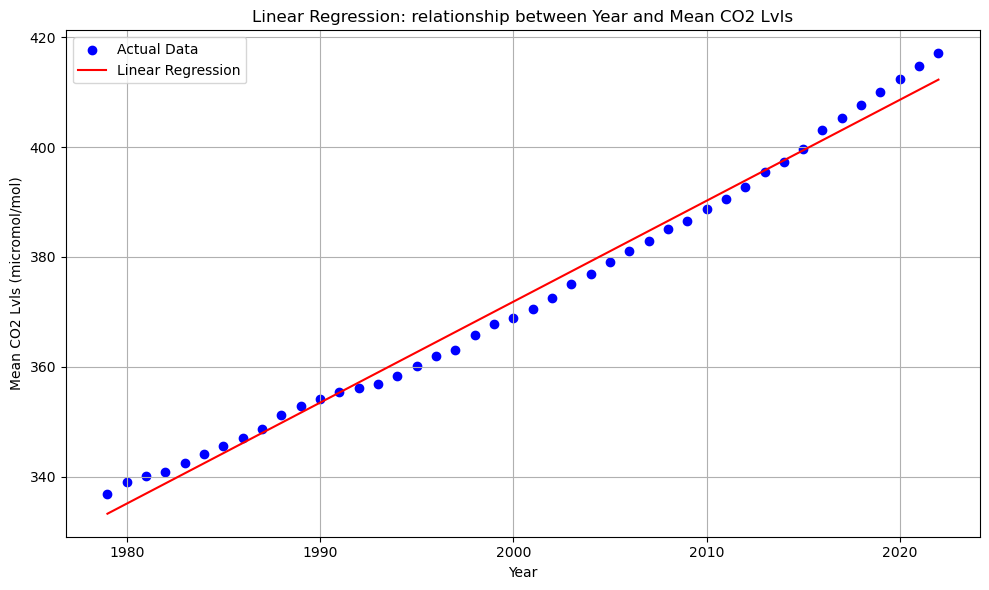

In [11]:
import matplotlib.pyplot as plt

# create scatter plot of actual data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')

# plot the linear regression line
# model(X)
# predicts the mean CO2 levels using linear regression model (model) based on values of X years 
# it calculates predicted mean CO2 lvls for each year in X
plt.plot(X, model.predict(X), color='red', label='Linear Regression')

# add labels and title
plt.title('Linear Regression: relationship between Year and Mean CO2 Lvls')
plt.xlabel('Year')
plt.ylabel('Mean CO2 Lvls (micromol/mol)')
plt.legend()

# show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# years for prediction
future_years = [[2025], [2030], [2040], [2050], [2100]]

# use linear regression model to predict mean CO2 lvls for future years
predicted_co2 = model.predict(future_years)

# display the predictions
for year, co2 in zip([2025, 2030, 2040, 2050, 2100], predicted_co2):
    # co2 gives the value from the zip fucntion and .2f limits the decimal places
    print(f"Predicted mean CO2 level for {year}: {co2:.2f} micromol/mol")


Predicted mean CO2 level for 2025: 417.80 micromol/mol
Predicted mean CO2 level for 2030: 426.99 micromol/mol
Predicted mean CO2 level for 2040: 445.37 micromol/mol
Predicted mean CO2 level for 2050: 463.76 micromol/mol
Predicted mean CO2 level for 2100: 555.68 micromol/mol


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


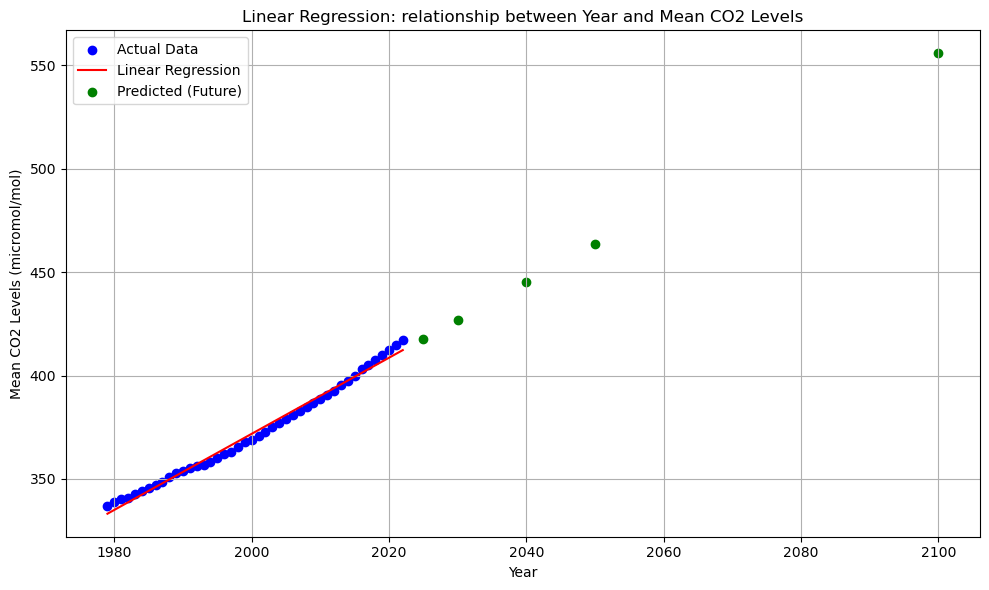

In [14]:
import numpy as np

# create array of future years
# reshape is used for making sure that data fits input for linear regression model
future_years_array = np.array(future_years).reshape(-1, 1)

# predict mean CO2 lvls for future years
predicted_co2_future = model.predict(future_years_array)

# plot actual data and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression')

# plot the predicted mean CO2 lvls for future years
plt.scatter(future_years, predicted_co2_future, color='green', label='Predicted (Future)')

# add labels title
plt.title('Linear Regression: relationship between Year and Mean CO2 Levels')
plt.xlabel('Year')
plt.ylabel('Mean CO2 Levels (micromol/mol)')
plt.legend()

# show plot
plt.grid(True)
plt.tight_layout()
plt.show()
